In [1]:
# Importing libraries in Python
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics

In [2]:
#Reading the dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*We can see that there is no null value but the label is an object which needs to be encoded so that our model can understand it, for that we will use the label encoder.*

In [4]:
#Analysing the statistical properties of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


*We can clearly see that there is no outlier in our dataset as the maximum and the minimum for every column is in the range of 3 times the Interquartile range. The mean and the median are also very similar for every case and hence we can directly start working on our model.*

In [5]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
#Using LabelEncoder on the label so that our model can understand it.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])

In [7]:
#Creating the label and the feature sets
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [8]:
#Splitting into train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=19)

In [9]:
#Hyperparameter tuning the model to get the optimal parameters.
max = 0
depth = 0
for i in range(1,5):
  clf = DecisionTreeClassifier(max_depth = i, random_state = 0)
  clf.fit(X_train, y_train)
  print(clf.score(X, y),"/", i)
  if clf.score(X, y)>max:
    max = clf.score(X, y)
    depth = i

print("Max Score, Depth: ", max,"/", depth)
  

0.6666666666666666 / 1
0.96 / 2
0.9733333333333334 / 3
0.98 / 4
Max Score, Depth:  0.98 / 4


In [10]:
#Creating the model using the above parameters
clf = DecisionTreeClassifier(max_depth = 4, random_state = 3)
clf.fit(X_train, y_train)
y_hat1 = clf.predict(X_test)
print("R2 Score: ", clf.score(X, y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat1))

R2 Score:  0.98
Mean Absolute Error: 0.07894736842105263


[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [36, 36, 40]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.75\ngini = 0.499\nsamples = 76\nvalue = [0, 36, 40]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.05\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.8

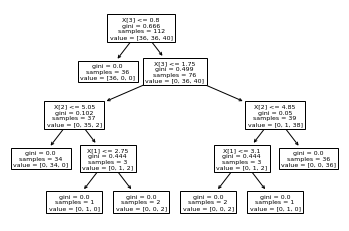

In [11]:
#Using basic function to plot decision tree
tree.plot_tree(clf)

[Text(372.0, 815.4, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [36, 36, 40]\nclass = virginica'),
 Text(279.0, 634.2, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(465.0, 634.2, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 76\nvalue = [0, 36, 40]\nclass = virginica'),
 Text(186.0, 453.0, 'petal length (cm) <= 5.05\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(93.0, 271.80000000000007, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(279.0, 271.80000000000007, 'sepal width (cm) <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(186.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(372.0, 90.60000000000002, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(744.0, 453.0, 'petal length (cm) <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(651.0, 271.8000

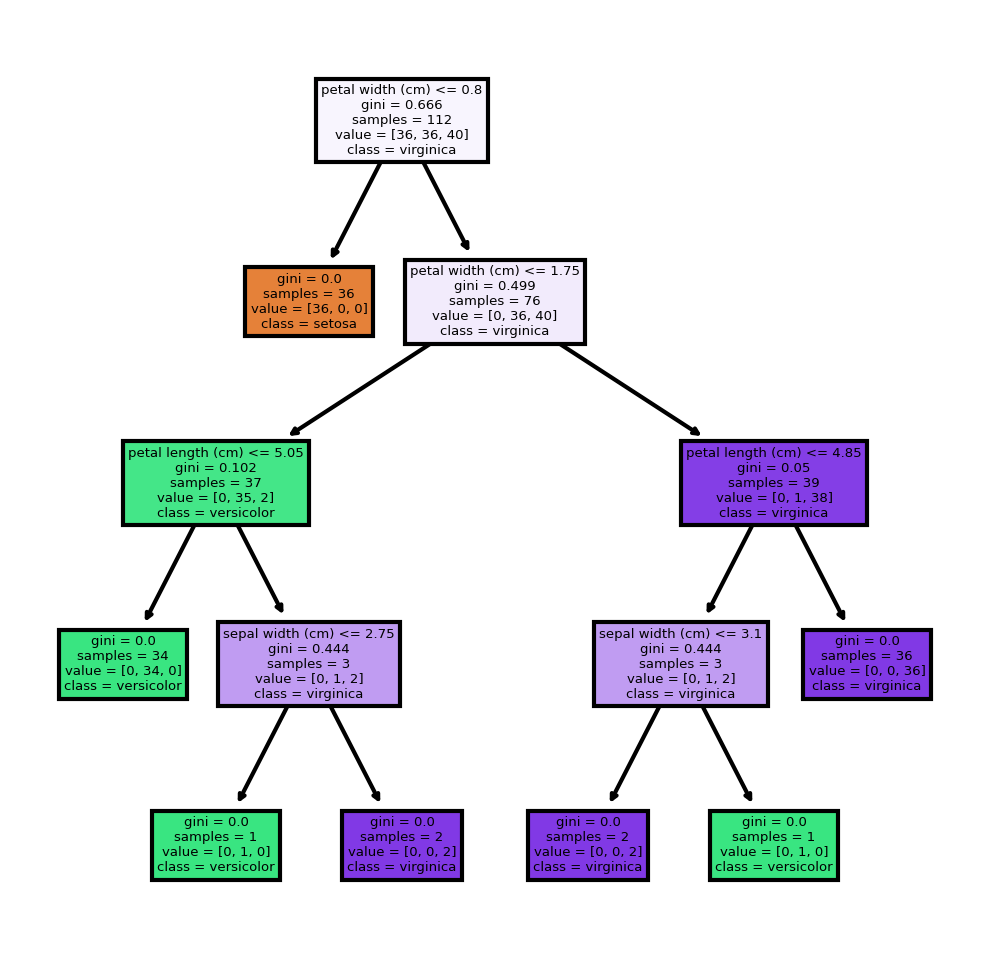

In [12]:
#Adding feature names, labels on each node to make the tree more informative.
features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
labels=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,feature_names = features, class_names=labels, filled = True)

In [13]:
#Using a Random forest classifier to make a new model
rf = RandomForestClassifier(n_estimators=100, random_state=93)
rf.fit(X_train, y_train)
y_hat2 = rf.predict(X_test)
print("R2 Score: ", rf.score(X, y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat2))

R2 Score:  0.9866666666666667
Mean Absolute Error: 0.05263157894736842


[Text(372.0, 792.75, 'petal length (cm) <= 2.45\ngini = 0.655\nsamples = 76\nvalue = [46, 37, 29]\nclass = setosa'),
 Text(186.0, 566.25, 'gini = 0.0\nsamples = 28\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(558.0, 566.25, 'petal width (cm) <= 1.7\ngini = 0.493\nsamples = 48\nvalue = [0, 37, 29]\nclass = versicolor'),
 Text(372.0, 339.75, 'petal length (cm) <= 5.45\ngini = 0.051\nsamples = 27\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(186.0, 113.25, 'gini = 0.0\nsamples = 26\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(558.0, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(744.0, 339.75, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 28]\nclass = virginica')]

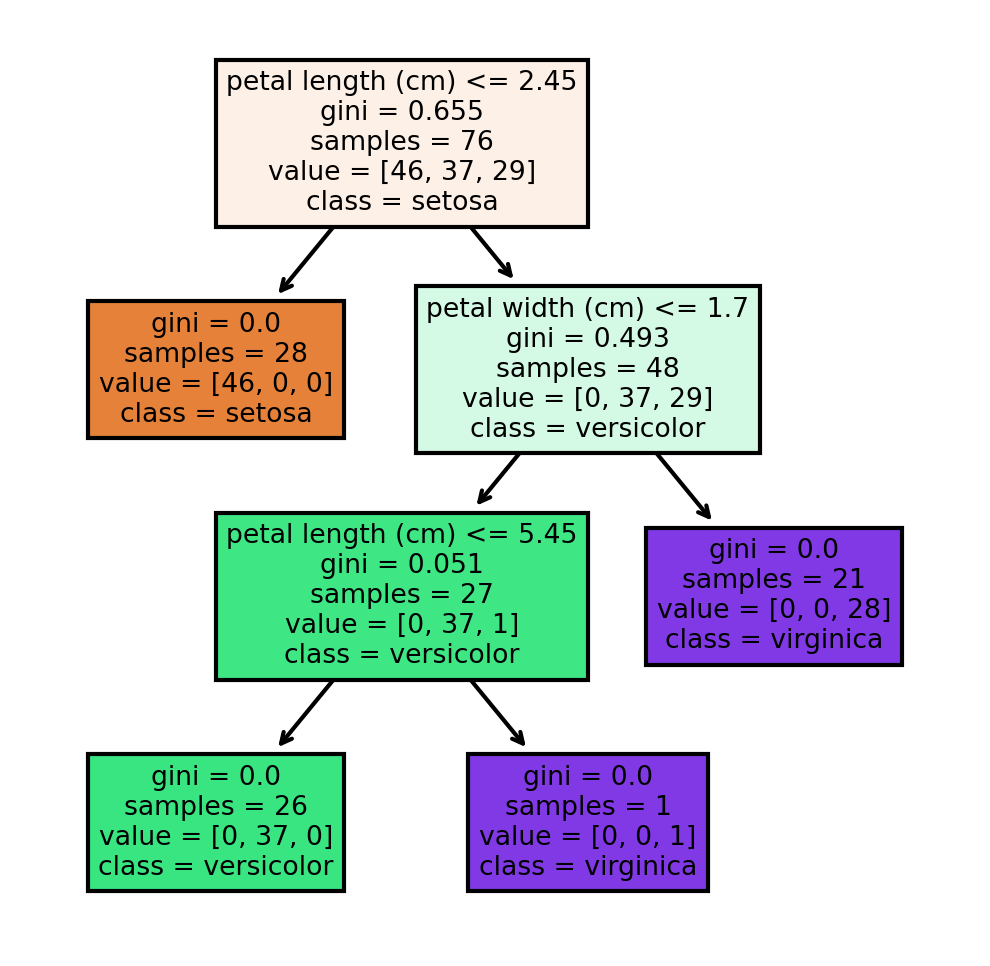

In [14]:
#visualizing the estimators for the Random Forest Classifier
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(rf.estimators_[-1], feature_names = features, class_names=labels, filled = True)

In [15]:
#Using custom input to verify the decision tree based model
sl = float(input("Enter sepal length: "))
sw = float(input("Enter sepal width: "))
pl = float(input("Enter petal length: "))
pw = float(input("Enter petal width: "))

pred = clf.predict([[sl,sw,pl,pw]])
if pred==0:
  print("Iris-Setosa")
elif pred==1:
  print("Iris-versicolor")
else:
  print("Iris-virginica")

Enter sepal length: 6
Enter sepal width: 3
Enter petal length: 4.8
Enter petal width: 1.8
Iris-virginica
